In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
thptqg = pd.read_csv('Diemthi_thpt_quocgia_2016.csv')

thptqg.head()

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,DIEM_THI
0,18000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.00 Ngữ văn: 5.50 Lịch sử: 3....
1,18000002,ĐỖ VĂN AN,9/12/1998,Sở GDĐT Bắc Giang,Nam,Toán: 5.50 Ngữ văn: 5.25 Địa lí: 5.5...
2,18000003,ĐỖ XUÂN AN,12/08/1997,Sở GDĐT Bắc Giang,Nam,Toán: 4.50 Ngữ văn: 5.50 Địa lí: 3.7...
3,18000004,ĐẶNG PHÚC AN,19/03/1998,Sở GDĐT Bắc Giang,Nữ,Toán: 3.00 Ngữ văn: 6.00 Địa lí: 5.5...
4,18000005,ĐẶNG VĂN AN,25/10/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.25 Ngữ văn: 4.75 Địa lí: 5.2...


In [76]:
thptqg.shape[0]

34826

In [6]:
#------------------------RÚT TRÍCH ĐIỂM TOÁN VĂN ANH RA THEO TÊN HỌC SINH, TẠO THÀNH DATAFRAME RỒI VẼ--------------#

In [7]:
DIEM_TOAN =[]
DIEM_VAN = []
DIEM_ANH = []

In [8]:
for i in range(thptqg.shape[0]): 
    list_diem_hs = thptqg['DIEM_THI'][i].split() #Dò từng hàng, lấy giá trị ở cột DIEM_THI, rồi split chuỗi ra theo dấu phân cách là ' ' 
    if 'Toán:' not in list_diem_hs:
        DIEM_TOAN.append(np.NaN)                 #Nếu hs không có điểm toán thì để là NaN
    else:
        j=list_diem_hs.index('Toán:')           #Nếu hs có điểm thì dò index điểm Toán trong list, rồi thêm vào list DIEM_TOAN
        DIEM_TOAN.append(float(list_diem_hs[j+1]))
    
    if 'văn:' not in list_diem_hs:
        DIEM_VAN.append(np.NaN)
    else:
        j=list_diem_hs.index('văn:')            #Dò điểm Ngữ Văn
        DIEM_VAN.append(float(list_diem_hs[j+1]))
                
    if 'Anh:' not in list_diem_hs:
        DIEM_ANH.append(np.NaN)
    else:
        j = list_diem_hs.index('Anh:')            #Dò điểm Tiếng Anh
        DIEM_ANH.append(float(list_diem_hs[j+1]))

In [9]:
len(DIEM_TOAN)

34826

In [10]:
len(DIEM_ANH)

34826

In [11]:
len(DIEM_VAN)

34826

In [12]:
#Tạo dataframe thptqg_TVA chỉ chứa điểm Toán, Văn và Anh
thptqg_TVA = thptqg.drop(labels='DIEM_THI', axis=1) #axis=1 để nó hiểu đó là label cho cột chứ không phải cho hàng

thptqg_TVA['DIEM_TOAN'] = DIEM_TOAN
thptqg_TVA['DIEM_VAN'] = DIEM_VAN
thptqg_TVA['DIEM_ANH'] = DIEM_ANH


In [13]:
thptqg_TVA.head(10)

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,DIEM_TOAN,DIEM_VAN,DIEM_ANH
0,18000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,2.00,5.50,NaN
1,18000002,ĐỖ VĂN AN,9/12/1998,Sở GDĐT Bắc Giang,Nam,5.50,5.25,3.68
2,18000003,ĐỖ XUÂN AN,12/08/1997,Sở GDĐT Bắc Giang,Nam,4.50,5.50,2.25
3,18000004,ĐẶNG PHÚC AN,19/03/1998,Sở GDĐT Bắc Giang,Nữ,3.00,6.00,1.50
4,18000005,ĐẶNG VĂN AN,25/10/1998,Sở GDĐT Bắc Giang,Nam,2.25,4.75,2.00
5,18000006,HÀ THỊ AN,22/06/1998,Sở GDĐT Bắc Giang,Nữ,5.75,5.50,3.55
6,18000007,HÀ THỊ AN,23/04/1997,Sở GDĐT Bắc Giang,Nữ,1.75,5.25,1.75
7,18000008,HỨA VĂN AN,25/05/1998,Sở GDĐT Bắc Giang,Nam,2.00,4.75,1.13
8,18000009,HOÀNG VĂN AN,22/02/1998,Sở GDĐT Bắc Giang,Nam,3.75,5.00,2.75
9,18000010,LA VĂN AN,19/08/1998,Sở GDĐT Bắc Giang,Nam,3.50,5.00,2.13


In [14]:
thptqg_TVA.isnull().sum() #Kiểm tra các giá trị NaN

SOBAODANH        0
HO_TEN           0
NGAY_SINH        0
TEN_CUMTHI       0
GIOI_TINH        0
DIEM_TOAN      326
DIEM_VAN       932
DIEM_ANH      4626
dtype: int64

In [15]:
thptqg_TVA.TEN_CUMTHI.value_counts() #Đếm các tên cụm thi

TEN_CUMTHI
Trường Đại học Công nghiệp Tp. HCM    14410
Sở GDĐT Bắc Giang                     10730
Sở GDĐT Hoà Bình                       6029
Sở GDĐT Thừa Thiên -Huế                3657
Name: count, dtype: int64

In [16]:
#Thay các giá trị NaN bằng điểm trung bình theo cụm thi. 
#Ví dụ môn Toán có 326 NaN, thì thay 326 NaN đó bằng điểm trung bình tính theo các cụm thi như Bắc Giang, HCM, Hoà Bình,...
thptqg_TVA['DIEM_TOAN'] = thptqg_TVA['DIEM_TOAN'].fillna(thptqg_TVA.groupby('TEN_CUMTHI')['DIEM_TOAN'].transform('mean'))

thptqg_TVA['DIEM_VAN']=thptqg_TVA['DIEM_VAN'].fillna(thptqg_TVA.groupby('TEN_CUMTHI')['DIEM_VAN'].transform('mean'))

thptqg_TVA['DIEM_ANH']=thptqg_TVA['DIEM_ANH'].fillna(thptqg_TVA.groupby('TEN_CUMTHI')['DIEM_ANH'].transform('mean'))

In [17]:
thptqg_TVA.head(10)

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,DIEM_TOAN,DIEM_VAN,DIEM_ANH
0,18000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,2.00,5.50,2.669664
1,18000002,ĐỖ VĂN AN,9/12/1998,Sở GDĐT Bắc Giang,Nam,5.50,5.25,3.680000
2,18000003,ĐỖ XUÂN AN,12/08/1997,Sở GDĐT Bắc Giang,Nam,4.50,5.50,2.250000
3,18000004,ĐẶNG PHÚC AN,19/03/1998,Sở GDĐT Bắc Giang,Nữ,3.00,6.00,1.500000
4,18000005,ĐẶNG VĂN AN,25/10/1998,Sở GDĐT Bắc Giang,Nam,2.25,4.75,2.000000
5,18000006,HÀ THỊ AN,22/06/1998,Sở GDĐT Bắc Giang,Nữ,5.75,5.50,3.550000
6,18000007,HÀ THỊ AN,23/04/1997,Sở GDĐT Bắc Giang,Nữ,1.75,5.25,1.750000
7,18000008,HỨA VĂN AN,25/05/1998,Sở GDĐT Bắc Giang,Nam,2.00,4.75,1.130000
8,18000009,HOÀNG VĂN AN,22/02/1998,Sở GDĐT Bắc Giang,Nam,3.75,5.00,2.750000
9,18000010,LA VĂN AN,19/08/1998,Sở GDĐT Bắc Giang,Nam,3.50,5.00,2.130000


In [18]:
#-----------------------------VẼ BIỂU ĐỒ  CỘT LIỀN ĐỂ  THỂ HIỆN ĐIỂM TB TOÁN VĂN ANH THEO TỪNG CỤM THI--------------#

In [27]:
draw = thptqg_TVA.groupby('TEN_CUMTHI')[['DIEM_TOAN','DIEM_VAN','DIEM_ANH']].mean() #Tạo dữ liệu phù hợp để  vẽ
draw

,DIEM_TOAN,DIEM_VAN,DIEM_ANH
TEN_CUMTHI,,,
Sở GDĐT Bắc Giang,3.914950,5.062745,2.669664
Sở GDĐT Hoà Bình,3.190559,4.977855,2.758185
Sở GDĐT Thừa Thiên -Huế,3.923577,4.567786,2.826335
Trường Đại học Công nghiệp Tp. HCM,4.994128,4.904637,3.485547


In [38]:
x = np.arange(draw.shape[0]) #Tạo chuỗi x chứa giá trị toạ độ
x

array([0, 1, 2, 3])

In [41]:
w = 0.2 #Độ rộng các cột là 0.35

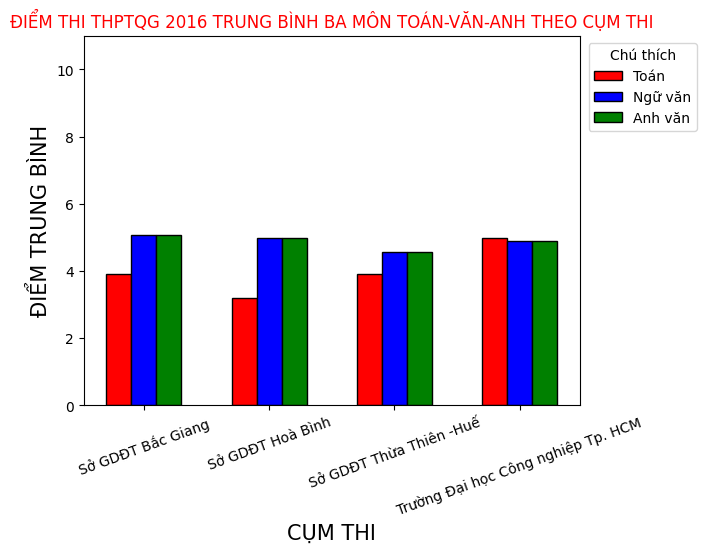

In [61]:
fig,ax = plt.subplots() #Tạo hai object là fig(figure) và ax(axes)

#plt.figure(figsize=(15,10))

ax.bar(x-w,draw['DIEM_TOAN'], width=w, label='Toán', color='r', edgecolor='black')
ax.bar(x,draw['DIEM_VAN'], width=w, label='Ngữ văn', color='blue', edgecolor='black')
ax.bar(x+w,draw['DIEM_VAN'], width=w, label='Anh văn', color='green', edgecolor='black')

ax.set_xticks(x)
ax.set_xticklabels(draw.index, rotation=20) #Đặt lại tên cho trục x
ax.set_xlabel('CỤM THI',size=15)

ax.set_ylim(0,11)
ax.set_ylabel('ĐIỂM TRUNG BÌNH',size=15)

ax.set_title('ĐIỂM THI THPTQG 2016 TRUNG BÌNH BA MÔN TOÁN-VĂN-ANH THEO CỤM THI', color='r')
ax.legend(title='Chú thích',bbox_to_anchor=(1.25,1.0)) #bbox_to_anchor để điều chỉnh vị trí của ô chú thích

plt.show()

In [4]:
#---------------------------------------SỬA THEO THẦY--------------------------------------------#

In [ ]:
#-------Thử với 1 học sinh--------#

In [77]:
thptqg.loc[0,'DIEM_THI'] #Xem điểm thi của thí sinh đầu tiên

'Toán:   2.00   Ngữ văn:   5.50   Lịch sử:   3.00   Địa lí:   5.00'

In [79]:
lst0 = thptqg.loc[0,'DIEM_THI'].split(' '*2) #Nhận thấy tên môn và điểm cách nhau 2-3 kỹ tự khoảng trắng ' '
                                               #Nên phân cắt chuỗi này thành các chuỗi nhỏ hơn, đơn vị phân cách là ' '*2
lst0

['Toán:',
 ' 2.00',
 ' Ngữ văn:',
 ' 5.50',
 ' Lịch sử:',
 ' 3.00',
 ' Địa lí:',
 ' 5.00']

In [80]:
ten_mon = []
so_diem = []

for i in range(len(lst0)):
    if i%2 == 0: #Nhận thấy tên môn có số  index chẵn, nên thấy index chẵn thì cho phần tử đó vào lst_mon
        ten_mon.append(lst0[i].strip().rstrip(':')) #rstrip() để bỏ dấu hai chấm
    else: #Ngược lại, điểm số có index lẻ, nên nếu thấy index lẻ thì cho phần tử đó vào lst_diem
        so_diem.append(lst0[i].strip())

In [81]:
ten_mon

['Toán', 'Ngữ văn', 'Lịch sử', 'Địa lí']

In [82]:
so_diem

['2.00', '5.50', '3.00', '5.00']

In [83]:
df_mon_diem = pd.DataFrame({'mon':ten_mon, 'diem':so_diem}) #Tạo dataframe gồm môn và điểm
df_mon_diem

,mon,diem
0,Toán,2.00
1,Ngữ văn,5.50
2,Lịch sử,3.00
3,Địa lí,5.00


In [20]:
#---------Làm cho nhiều học sinh-----# 

In [84]:
def to_df_mon_diem(chuoi): #Tạo hàm để xử lý các thao tác trên
    ten_mon = []
    so_diem = []
    lstHS = chuoi.split(' '*2)
    for i in range(len(lstHS)):
        if i%2 == 0: #Nhận thấy tên môn có số  index chẵn, nên thấy index chẵn thì cho phần tử đó vào ten_mon
            ten_mon.append(lstHS[i].strip().rstrip(':')) #rstrip() để bỏ dấu hai chấm
        else: #Ngược lại, điểm số có index lẻ, nên nếu thấy index lẻ thì cho phần tử đó vào so_diem
            so_diem.append(lstHS[i].strip())

    return pd.DataFrame({'mon':ten_mon, 'diem':so_diem}) #Tạo dataframe gồm môn và điểm

In [85]:
#Test hàm vừa mới tạo
chuoi1 = thptqg.loc[0,'DIEM_THI']
hs1 = to_df_mon_diem(chuoi1)

hs1

,mon,diem
0,Toán,2.00
1,Ngữ văn,5.50
2,Lịch sử,3.00
3,Địa lí,5.00


In [88]:
#Tạo các list thông tin cần dùng
lst_sbd = []
lst_mon = []
lst_diem = []
lst_cumthi = []

In [89]:
#Bắt đầu xử lý:

for i in range(thptqg.shape[0]):
    df_1hs = to_df_mon_diem(thptqg.loc[i,'DIEM_THI']) #Dò từng học sinh để tạo dataframe tên môn và điểm tương ứng cho học sinh đó
    
    for j in range(df_1hs.shape[0]):
        lst_sbd.append(thptqg.loc[i,'SOBAODANH']) #Thêm sbd của hs đó vào lst_sbd
        lst_cumthi.append(thptqg.loc[i,'TEN_CUMTHI']) #Thêm tên cụm thi của hs đó vào lst_cumthi
        lst_mon.append(df_1hs.loc[j,'mon']) #Thêm tên từng môn học mà hs đó thi vào lst_mon, để mỗi môn là một cột riêng sau này                                    
        lst_diem.append(df_1hs.loc[j,'diem']) #Thêm điểm thi của từng học sinh tương ứng với từng môn vào

df_allHS = pd.DataFrame({'SBD':lst_sbd, 'Cum_thi':lst_cumthi, 'Mon':lst_mon, 'Diem':lst_diem})

In [90]:
df_allHS.head() #Nhận thấy data frame tạo ra ở dạng bảng dài, có nhiều thông tin bị lặp lại
                #Nên khi vẽ thì phải groupby

,SBD,Cum_thi,Mon,Diem
0,18000001,Sở GDĐT Bắc Giang,Toán,2.00
1,18000001,Sở GDĐT Bắc Giang,Ngữ văn,5.50
2,18000001,Sở GDĐT Bắc Giang,Lịch sử,3.00
3,18000001,Sở GDĐT Bắc Giang,Địa lí,5.00
4,18000002,Sở GDĐT Bắc Giang,Toán,5.50


In [91]:
df_allHS.tail()

,SBD,Cum_thi,Mon,Diem
145869,HUI014543,Trường Đại học Công nghiệp Tp. HCM,Ngữ văn,4.25
145870,HUI014543,Trường Đại học Công nghiệp Tp. HCM,Vật lí,4.20
145871,HUI014543,Trường Đại học Công nghiệp Tp. HCM,Hóa học,4.40
145872,HUI014543,Trường Đại học Công nghiệp Tp. HCM,Sinh học,4.40
145873,HUI014543,Trường Đại học Công nghiệp Tp. HCM,Tiếng Anh,3.00


In [97]:
#Điều chỉnh lại bảng
df_allHS_pivot = df_allHS.pivot(index='SBD', #Đặt index = SBD, khi đó các giá trị SBD chỉ lặp lại một lần duy nhất 
                               columns='Mon',
                               values=['Diem']).reset_index()

df_allHS_pivot.head()

SBD    Diem                                                \
Mon           Hóa học Lịch sử Ngữ văn Sinh học Tiếng Anh Tiếng Nhật   
0    18000001     NaN    3.00    5.50      NaN       NaN        NaN   
1    18000002     NaN     NaN    5.25      NaN      3.68        NaN   
2    18000003     NaN     NaN    5.50      NaN      2.25        NaN   
3    18000004     NaN     NaN    6.00      NaN      1.50        NaN   
4    18000005     NaN     NaN    4.75      NaN      2.00        NaN   

                                                          
Mon Tiếng Pháp Tiếng Trung Tiếng Đức  Toán Vật lí Địa lí  
0          NaN         NaN       NaN  2.00    NaN   5.00  
1          NaN         NaN       NaN  5.50    NaN   5.50  
2          NaN         NaN       NaN  4.50    NaN   3.75  
3          NaN         NaN       NaN  3.00    NaN   5.50  
4          NaN         NaN       NaN  2.25    NaN   5.25